In [48]:
#import basics and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import calsification metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


In [49]:
data = pd.read_csv('data/train.csv')

In [50]:
#split data into 30% test and 70% train, random_state = 123, stratify = 'label', xtrain, xtest, ytrain, ytest

train, test = train_test_split(data, test_size=0.3, random_state=123, stratify=data['label'])


# train = train.sample(frac=0.05, replace=True, random_state=123, )
# test = test.sample(frac=0.1, replace=True, random_state=123, )

In [51]:
#import matplotlib.pyplot as plt

#model 1 - KNN model
training_acc = []
test_acc = []

In [52]:
## 1. KNN model

resultDict = {}

kRange = 20
def knn_model(xAll_train, xAll_test, yAll_train, yAll_test):
    #different knn parameters
    for k in range(kRange):
        model_KNN = KNeighborsClassifier(n_neighbors=k+1)
        model_KNN.fit(xAll_train, yAll_train)
        model_KNN.predict(xAll_train)
        train_score = model_KNN.score(xAll_train, yAll_train)
        #doesnt make sense to fit on test 
        #model.fit(xAll_test, yAll_test)
        model_KNN.predict(xAll_test)
        test_score = model_KNN.score(xAll_test, yAll_test)

        training_acc.append(train_score)
        test_acc.append(test_score)

        #store classification report and confusion matrix in a dictionary
        resultDict['KNN_model_' + str(k+1)] = [classification_report(yAll_test, model_KNN.predict(xAll_test)), confusion_matrix(yAll_test, model_KNN.predict(xAll_test))]

    plt.plot(range(1, kRange+1), training_acc,  color="blue", label="Training Accuracy")
    plt.plot(range(1, kRange+1), test_acc, color="red", label="Test Accuracy")

    #add labels and title
    plt.title('KNN Model')
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    #make X labels increase by even numbers
    plt.xticks(np.arange(1, kRange+1, 1.0))

    #draw a vertical line at the max test accuracy with a 50 percent opacity
    plt.axvline(x=test_acc.index(max(test_acc))+1, color='green', alpha=0.5)

In [53]:
x_train = train.drop("label", axis = 1)
x_test = test.drop("label", axis = 1)
# y is label column only
y_train = train["label"]
y_test = test["label"]

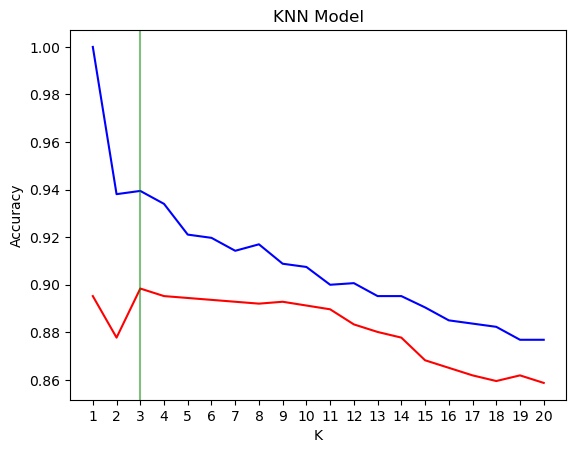

In [54]:
#call funtion
knn_model(x_train, x_test, y_train, y_test)

In [55]:
# print the element with the highest accuracy
print("The highest accuracy is: ", max(test_acc))
# test_acc

#get index of highest accuracy
index = test_acc.index(max(test_acc)) +1 
print("The index of the highest accuracy is: K = ", index)

The highest accuracy is:  0.8984126984126984
The index of the highest accuracy is: K =  3


In [56]:
#looking at the accuracy scores above, it seems like the best k is X
knearest = KNeighborsClassifier(n_neighbors=index)
knearest.fit(x_train, y_train)
#score on training data
knearest.score(x_train, y_train)

0.9394557823129251

In [57]:
#score on test data
knearest.score(x_test, y_test)

0.8984126984126984

In [58]:

#Check precision, recall, f1-score
y_pred = knearest.predict(x_test)
print( classification_report(y_test, y_pred) )

print( accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       118
           1       0.84      0.98      0.91       129
           2       0.95      0.88      0.91       139
           3       0.85      0.93      0.89       125
           4       0.84      0.93      0.88       122
           5       0.91      0.83      0.87       126
           6       0.92      0.95      0.94       102
           7       0.97      0.93      0.95       153
           8       0.96      0.77      0.85       133
           9       0.86      0.84      0.85       113

    accuracy                           0.90      1260
   macro avg       0.90      0.90      0.90      1260
weighted avg       0.90      0.90      0.90      1260

0.8984126984126984


In [59]:
import joblib

joblib.dump(knearest, 'models/model_knnFinal.pkl')

['models/model_knnFinal.pkl']